# Regression

In [1]:
## 1 λεπτό

# Θεωρεία

<br><br>**Δέντρα Απόφασης**

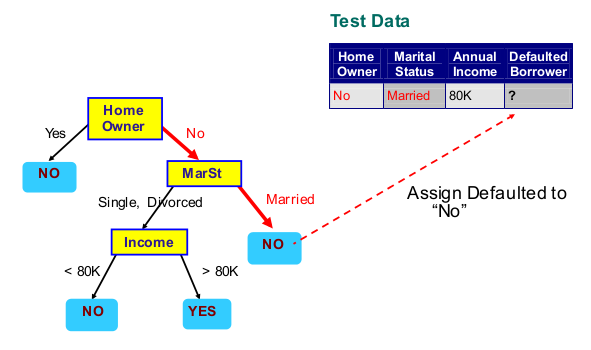

In [2]:
from IPython.display import Image
Image(filename='/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/θεωρεία/δέντρα απόφασης/1.png')

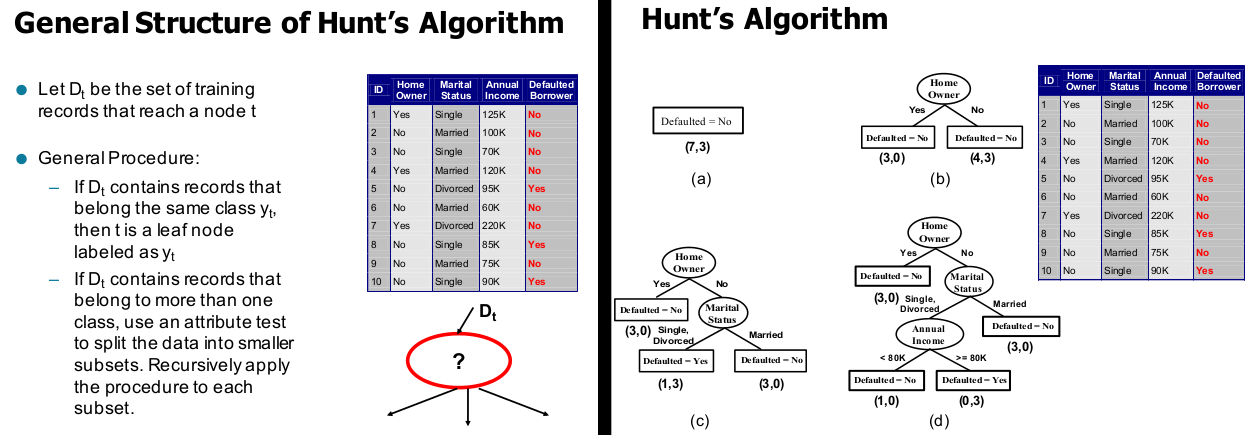

In [3]:
Image(filename='/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/θεωρεία/δέντρα απόφασης/2.png')

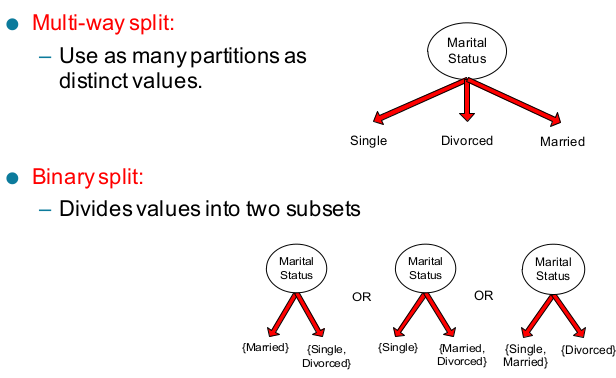

In [4]:
Image(filename='/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/θεωρεία/δέντρα απόφασης/3.png')

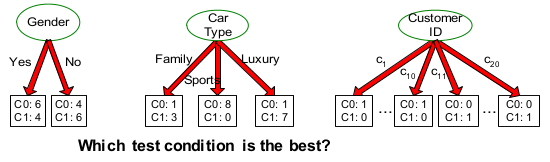

In [5]:
Image(filename='/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/θεωρεία/δέντρα απόφασης/4.png')

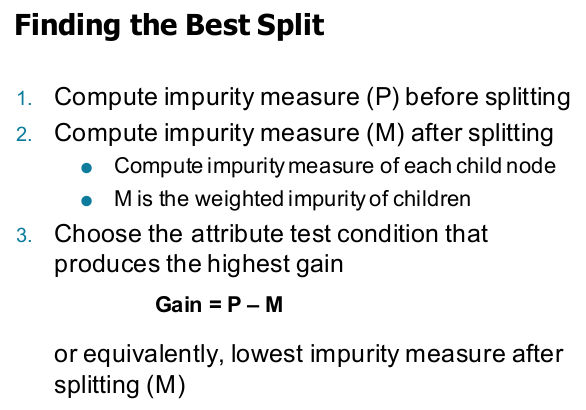

In [6]:
Image(filename='/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/θεωρεία/δέντρα απόφασης/5.png')

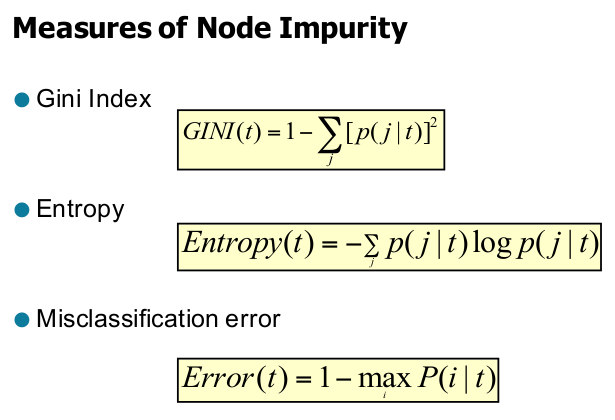

In [7]:
Image(filename='/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/θεωρεία/δέντρα απόφασης/6.png')

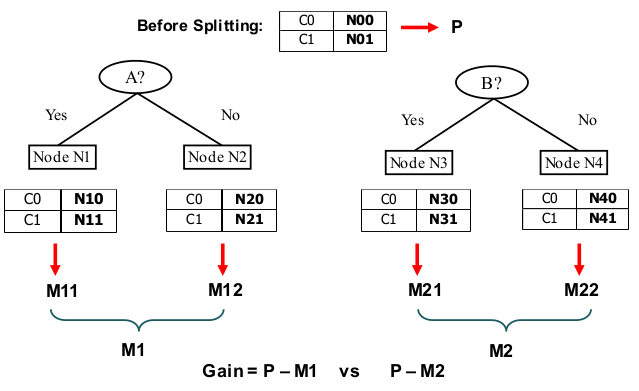

In [8]:
Image(filename='/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/θεωρεία/δέντρα απόφασης/7.png')

<br><br><br><br>
* Overfitting
* Preprocess
* Multi-Class classification
* Many decision trees for the same problem

<br><br>**Random Forest**

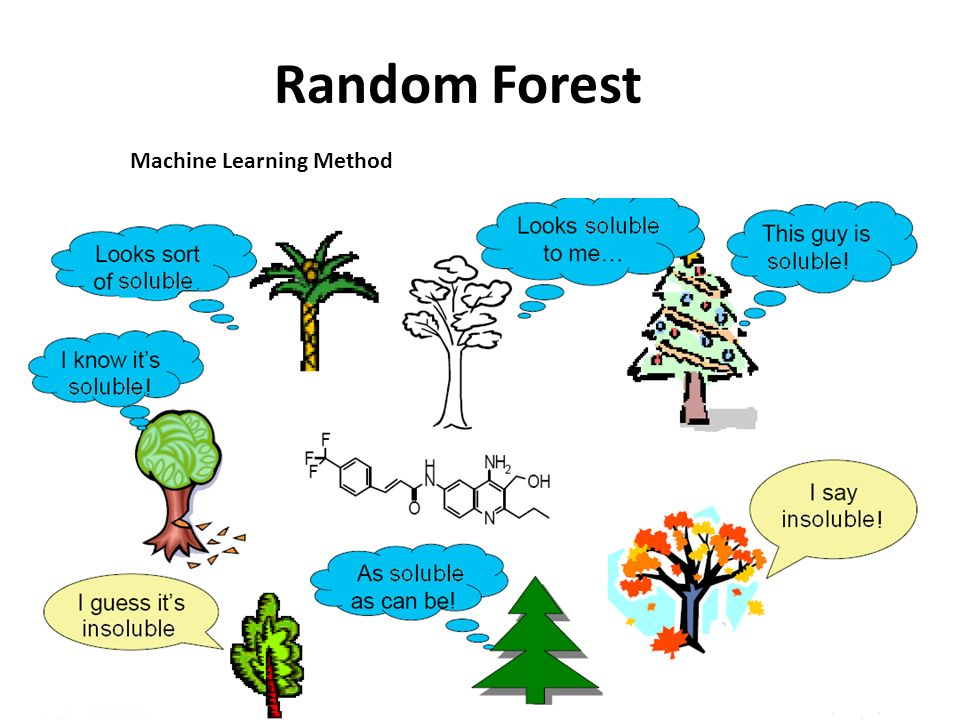

In [15]:
Image(filename='/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/θεωρεία/random forest/5.jpg')

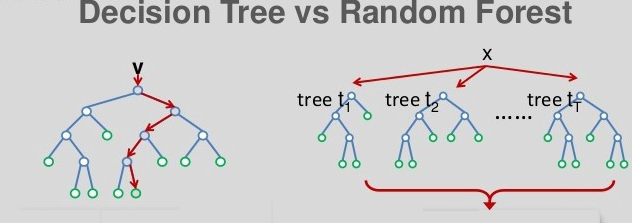

In [16]:
Image(filename='/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/θεωρεία/random forest/1.png')

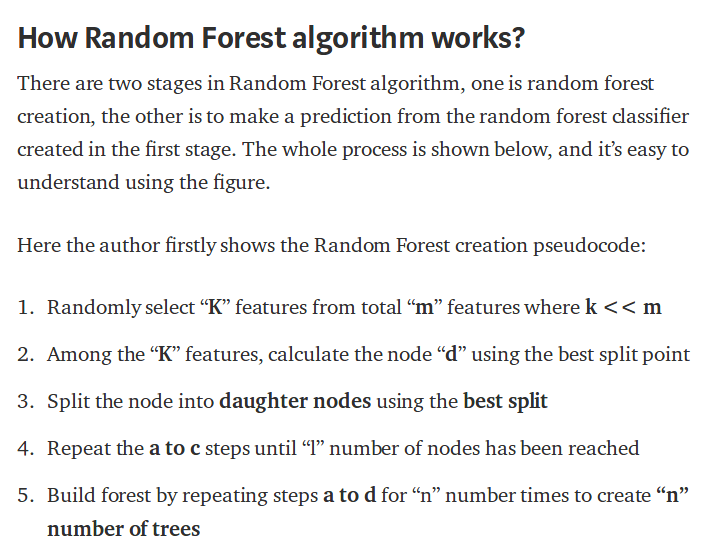

In [17]:
Image(filename='/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/θεωρεία/random forest/2.png')

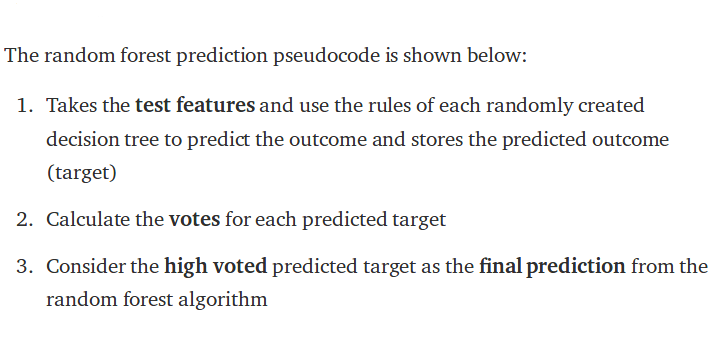

In [19]:
Image(filename='/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/θεωρεία/random forest/3.png')

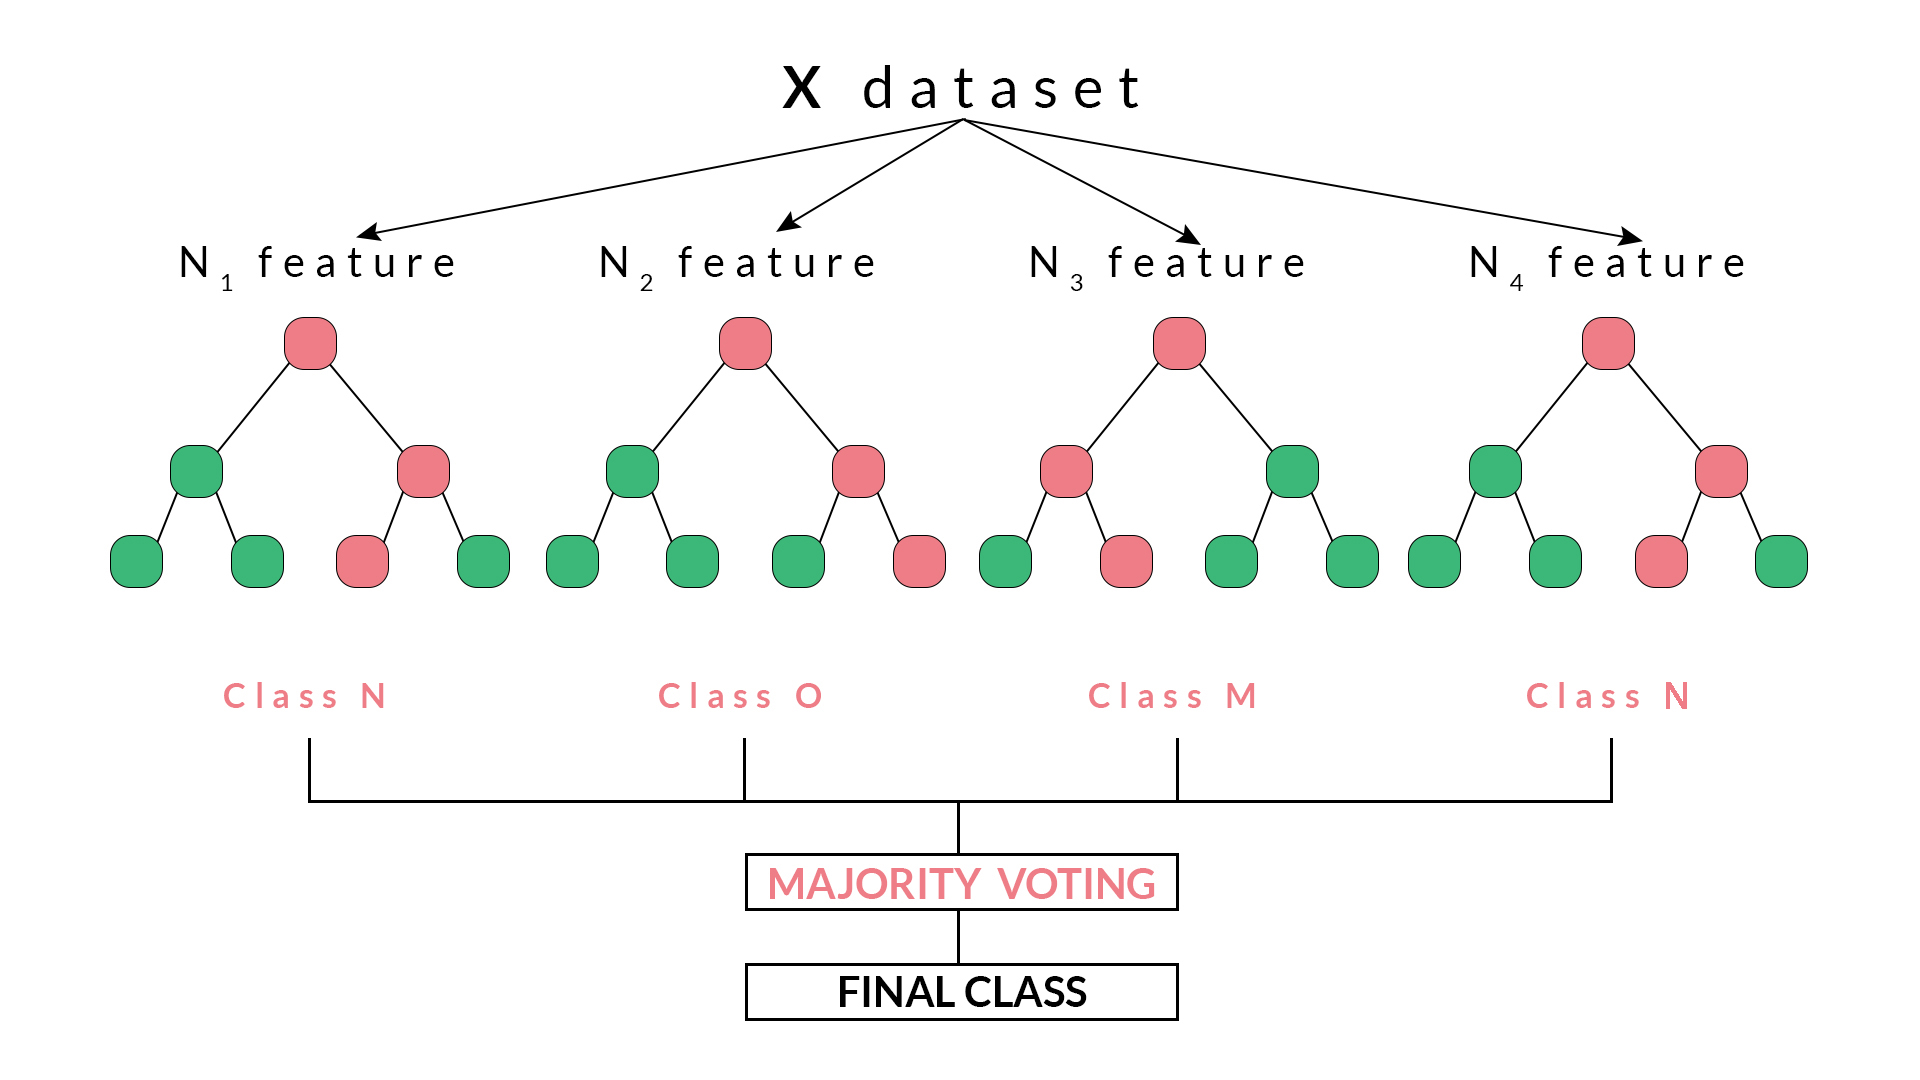

In [20]:
Image(filename='/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/θεωρεία/random forest/4.jpg')

<br><br><br><br>
* Overfitting
* Preprocess
* Multi-Class
* Feature Selection

<br><br>**Linear Regression**

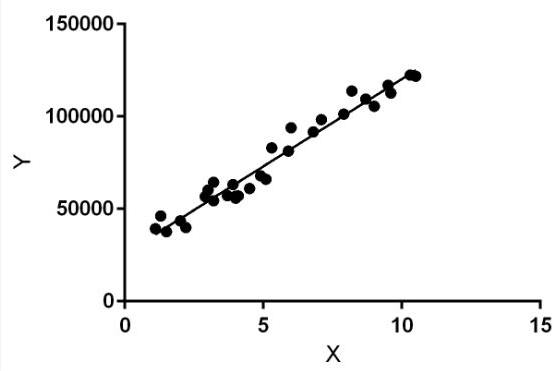

In [3]:
Image(filename='/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/θεωρεία/linear regression/1.png')

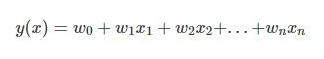

In [4]:
Image(filename='/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/θεωρεία/linear regression/2.png')

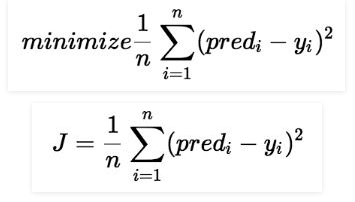

In [5]:
Image(filename='/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/θεωρεία/linear regression/3.png')

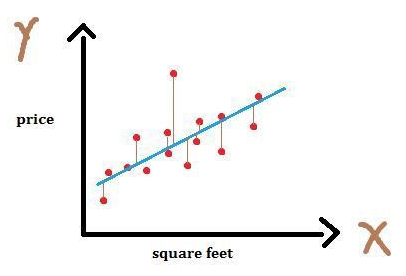

In [6]:
Image(filename='/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/θεωρεία/linear regression/4.png')

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns


data2 = pd.read_csv("/home/apostolis/0. ergasia/datasets/OnlineNewsPopularity_Regression.txt")
X2 = data2.iloc[:,0:56]
y2 = data2.iloc[:,56]
initRows = np.shape(data2)[0]
print("Initial dataset dimensions: " + str(np.shape(data2)))

Initial dataset dimensions: (39130, 57)


<br><br><br><br><br><br><br><br>
## **Training**

In [2]:
train, test = train_test_split(data2, test_size=0.2, random_state=42)
x_train = train.iloc[:,0:56]
y_train = train.iloc[:,56]
x_test = test.iloc[:,0:56]
y_test = test.iloc[:,56]

<br><br>
**Linear Regression**

In [3]:
# Linear Regression
LR = LinearRegression().fit(x_train, y_train)
pred = LR.predict(x_test)

compare = pd.DataFrame(np.transpose([y_test, pred]))
compare = compare.rename(index=str, columns={0: "Actual shares", 1: "Predicted shares"})
compare.head(5)

,Actual shares,Predicted shares
0,2600.0,2097.234141
1,870.0,1837.763631
2,1200.0,1055.796309
3,655.0,2636.569755
4,4600.0,3716.365302


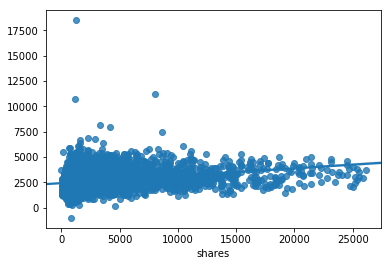

In [4]:
y_test = y_test.reset_index()
y_test = y_test.iloc[:,-1]
sns.regplot(y_test, pred)
plt.savefig("LR.png")

In [5]:
# metrics
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("Mean Squared Error = " + str(rmse))


#counter = 0
#counter1 = 0
#counter2 = 0
#thresholdLR = 100
#thresholdLR1 = 200
#thresholdLR2 = 300

#for i in range(np.shape(pred)[0]):
 #   if np.abs(pred[i] - y_test[i]) < thresholdLR:
  #      counter = counter + 1
   # if np.abs(pred[i] - y_test[i]) < thresholdLR1:
    #    counter1 = counter1 + 1
    #if np.abs(pred[i] - y_test[i]) < thresholdLR2:
     #   counter2 = counter2 + 1

#print("Accuracy -+100 = " + str(100 * counter / np.shape(pred)[0]) + " %")
#print("Accuracy -+200 = " + str(100 * counter1 / np.shape(pred)[0]) + " %")
#print("Accuracy -+300 = " + str(100 * counter2 / np.shape(pred)[0]) + " %")

Mean Squared Error = 3090.998431156559


<br><br><br><br>**Decision Tree**

In [6]:
DT = DecisionTreeRegressor(random_state=42).fit(x_train, y_train)
pred = DT.predict(x_test)

compare = pd.DataFrame(np.transpose([y_test, pred]))
compare = compare.rename(index=str, columns={0: "Actual shares", 1: "Predicted shares"})
compare.head(5)

,Actual shares,Predicted shares
0,2600.0,4700.0
1,870.0,852.0
2,1200.0,844.0
3,655.0,1400.0
4,4600.0,16200.0


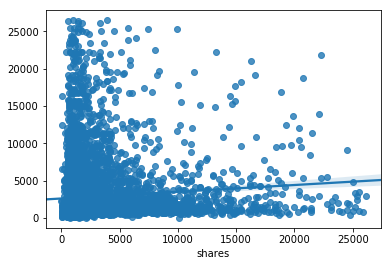

In [7]:
y_test = y_test.reset_index()
y_test = y_test.iloc[:,-1]
sns.regplot(y_test, pred)
plt.savefig("DT.png")

In [8]:
# metrics
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("Mean Squared Error = " + str(rmse))


#counter = 0
#counter1 = 0
#counter2 = 0
#thresholdDT = 100
#thresholdDT1 = 200
#thresholdDT2 = 300

#for i in range(np.shape(pred)[0]):
 #   if np.abs(pred[i] - y_test[i]) < thresholdDT:
  #      counter = counter + 1
   # if np.abs(pred[i] - y_test[i]) < thresholdDT1:
    #    counter1 = counter1 + 1
    #if np.abs(pred[i] - y_test[i]) < thresholdDT2:
     #   counter2 = counter2 + 1

#print("Accuracy -+100 = " + str(100 * counter / np.shape(pred)[0]) + " %")
#print("Accuracy -+200 = " + str(100 * counter1 / np.shape(pred)[0]) + " %")
#print("Accuracy -+300 = " + str(100 * counter2 / np.shape(pred)[0]) + " %")

Mean Squared Error = 4668.934291787844


<br><br><br><br>**Random Forest**

In [9]:
RanFor = RandomForestRegressor(random_state=42).fit(x_train, y_train)
pred = RanFor.predict(x_test)

compare = pd.DataFrame(np.transpose([y_test, pred]))
compare = compare.rename(index=str, columns={0: "Actual shares", 1: "Predicted shares"})
compare.head(5)

/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Actual shares,Predicted shares
0,2600.0,3671.6
1,870.0,1859.0
2,1200.0,2086.7
3,655.0,2470.0
4,4600.0,2734.2


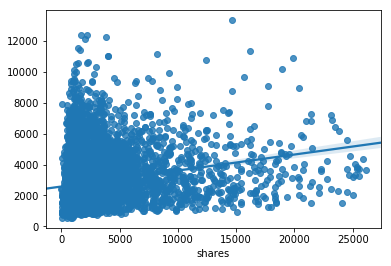

In [10]:
y_test = y_test.reset_index()
y_test = y_test.iloc[:,-1]
sns.regplot(y_test, pred)
plt.savefig("RF.png")

In [11]:
# metrics
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("Mean Squared Error = " + str(rmse))


#counter = 0
#counter1 = 0
#counter2 = 0
#thresholdRF = 100
#thresholdRF1 = 200
#thresholdRF2 = 300

#for i in range(np.shape(pred)[0]):
 #   if np.abs(pred[i] - y_test[i]) < thresholdRF:
  #      counter = counter + 1
   # if np.abs(pred[i] - y_test[i]) < thresholdRF1:
    #    counter1 = counter1 + 1
    #if np.abs(pred[i] - y_test[i]) < thresholdRF2:
     #   counter2 = counter2 + 1

#print("Accuracy -+100 = " + str(100 * counter / np.shape(pred)[0]) + " %")
#print("Accuracy -+200 = " + str(100 * counter1 / np.shape(pred)[0]) + " %")
#print("Accuracy -+300 = " + str(100 * counter2 / np.shape(pred)[0]) + " %")

Mean Squared Error = 3292.3606557347816


<br><br><br><br>
## Αποτελέσματα
<br><br>
**Results with all features**<br>
    &emsp;**Linear Regression**<br>
        &emsp;&emsp;MSE = 3088.94<br>
        &emsp;&emsp;Accuracy = 20.42 %<br>
    &emsp;**Decision Tree**<br>
        &emsp;&emsp;MSE = 4593.41<br>
        &emsp;&emsp;Accuracy = 37.67 %<br>
    &emsp;**Random Forest**<br>
        &emsp;&emsp;MSE = 3287.96<br>
        &emsp;&emsp;Accuracy = 28.89 %<br>
<br><br>